* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 38

---
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df_cancer = pd.read_csv('Cancer_Data.csv').iloc[:,:-1]
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### **Isi Missing Value Jika Ada**

In [4]:
df_cancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### **Gunakan Kolom `texture_mean` dan `concave_point_mean` sebagai Independent Variabel** 

### **Gunakan Kolom `diagnosis` sebagai Dependent Variabel**

In [5]:
x = df_cancer[['texture_mean', 'concave points_mean']]
y = df_cancer.diagnosis

### **Split data menjadi Train dan Test set dengan Proporsi 80 : 20 dan random state 42**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

### **Lakukan Klasifikasi dengan KNN**

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

### **Lakukan Klasifikasi dengan Decision Tree**

In [8]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

y_train_pred_dtree = dt.predict(X_train)
y_test_pred_dtree = dt.predict(X_test)

### **Keluarkan tree yg terbentuk**

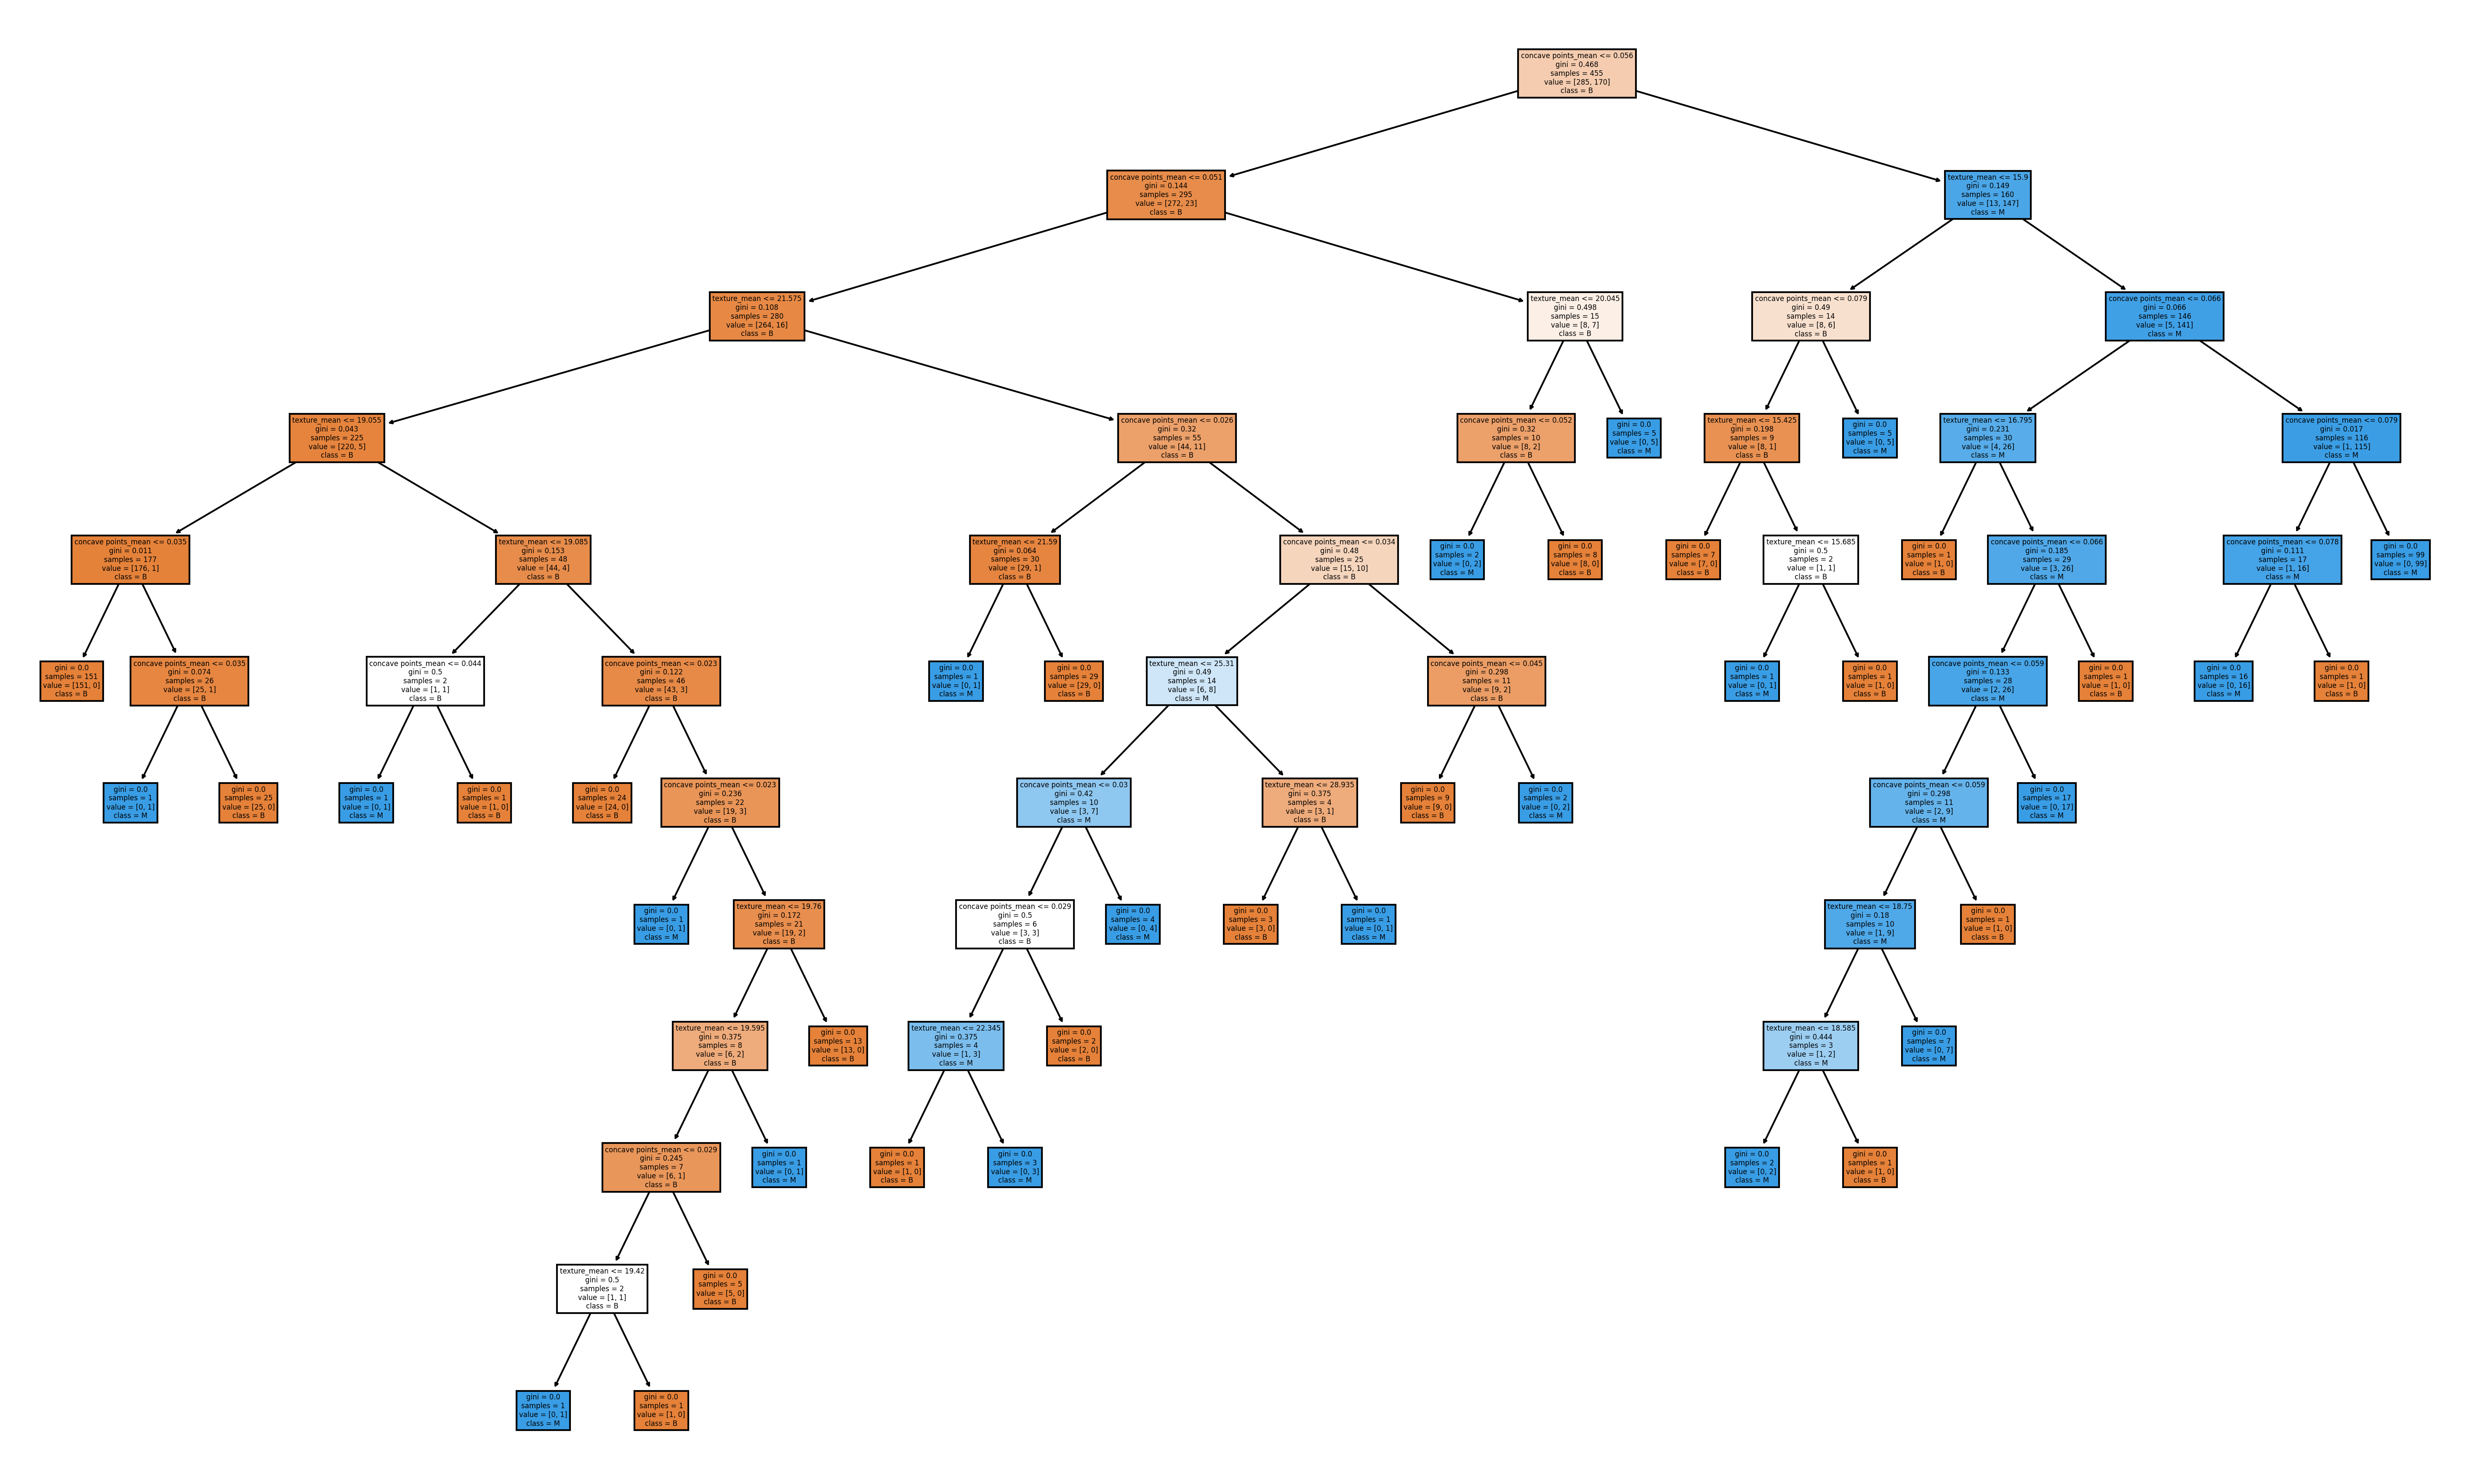

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15), dpi=300)  # Perbesar ukuran dan resolusi gambar
plot_tree(dt, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=dt.classes_)
plt.show()

### **Interpretasikan tree tersebut**

In [10]:
tree_rules = export_text(dt, feature_names=list(X_train.columns))
print(tree_rules)

|--- concave points_mean <= 0.06
|   |--- concave points_mean <= 0.05
|   |   |--- texture_mean <= 21.57
|   |   |   |--- texture_mean <= 19.06
|   |   |   |   |--- concave points_mean <= 0.04
|   |   |   |   |   |--- class: B
|   |   |   |   |--- concave points_mean >  0.04
|   |   |   |   |   |--- concave points_mean <= 0.04
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- concave points_mean >  0.04
|   |   |   |   |   |   |--- class: B
|   |   |   |--- texture_mean >  19.06
|   |   |   |   |--- texture_mean <= 19.09
|   |   |   |   |   |--- concave points_mean <= 0.04
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- concave points_mean >  0.04
|   |   |   |   |   |   |--- class: B
|   |   |   |   |--- texture_mean >  19.09
|   |   |   |   |   |--- concave points_mean <= 0.02
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- concave points_mean >  0.02
|   |   |   |   |   |   |--- concave points_mean <= 0.02
|   |   |   |   |   |   |   |--- c

* `concave points_mean` --> concave points_mean (jumlah cekungan pada kontur sel tumor) **Faktor utama yang menjadi pembeda tumor** Benign (jinak) dan Malignant (ganas)

* `texture_mean` -->  texture_mean (tekstur rata-rata dari sel tumor) **Faktor pendukung untuk klasifikasi**

    - Jika **concave points_mean kecil** (≤ 0.06) → Cenderung jinak (B)
    - Jika **concave points_mean besar** (> 0.06) → Cenderung ganas (M)
    - Jika **concave points_mean berada di tengah-tengah** (0.03 - 0.06), maka **texture_mean digunakan** untuk klasifikasi lebih lanjut
    - **Semakin tinggi concave points_mean dan texture_mean, semakin besar kemungkinan tumor ganas (M)**

`Kesimpulan` : **concave points_mean adalah fitur paling berpengaruh** dalam menentukan apakah tumor jinak atau ganas, **dengan beberapa pengecualian berdasarkan texture_mean**

### **Lakukan Evaluasi dan bandingkan antara KNN dan Decision Tree**

In [18]:
train_knn_accuracy = accuracy_score(y_train, y_train_pred_knn)
test_knn_accuracy = accuracy_score(y_test, y_test_pred_knn)

print('KNN Train set evaluation:')
print(f'Accuracy: {train_knn_accuracy}')
print(classification_report(y_train, y_train_pred_knn))

print('\nKNN Test set evaluation:')
print(f'Accuracy: {test_knn_accuracy}')
print(classification_report(y_test, y_test_pred_knn))

KNN Train set evaluation:
Accuracy: 0.8417582417582418
              precision    recall  f1-score   support

           B       0.85      0.91      0.88       285
           M       0.83      0.72      0.77       170

    accuracy                           0.84       455
   macro avg       0.84      0.82      0.83       455
weighted avg       0.84      0.84      0.84       455


KNN Test set evaluation:
Accuracy: 0.7456140350877193
              precision    recall  f1-score   support

           B       0.77      0.86      0.81        72
           M       0.70      0.55      0.61        42

    accuracy                           0.75       114
   macro avg       0.73      0.70      0.71       114
weighted avg       0.74      0.75      0.74       114



In [20]:
train_dtree_accuracy = accuracy_score(y_train, y_train_pred_dtree)
test_dtree_accuracy = accuracy_score(y_test, y_test_pred_dtree)

print('Decision Tree Train set evaluation:')
print(f'Accuracy: {train_dtree_accuracy}')
print(classification_report(y_train, y_train_pred_dtree))

print('\nDecision Tree Test set evaluation:')
print(f'Accuracy: {test_dtree_accuracy}')
print(classification_report(y_test, y_test_pred_dtree))

Decision Tree Train set evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Decision Tree Test set evaluation:
Accuracy: 0.9035087719298246
              precision    recall  f1-score   support

           B       0.94      0.90      0.92        72
           M       0.84      0.90      0.87        42

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114



### **Bandingkan Evaluasi antara Train dan Test**

In [ ]:
accuracy_data = {
    "Model": ["KNN", "Decision Tree"],
    "Train Accuracy": [train_knn_accuracy, train_dtree_accuracy],
    "Test Accuracy": [test_knn_accuracy, test_dtree_accuracy]
}

accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,KNN,0.841758,0.745614
1,Decision Tree,1.000000,0.903509


### **Buat Kesimpulan berdasarkan Evaluasi Model**

* Berdasarkan akurasi model KNN dan Decision Tree didapatkan **keduanya mengalami sedikit overfitting** yang mana kurang mampu sepenuhnya mempertahankan performanya pada data baru 

* Jika melihat dari evaluasi lainnya pada model KNN dan Decision Tree seperti **Recall**, dimana pada kasus ini sangat berbahaya ketika terjadi False Negative (kesalahan prediksi terhadap kanker Ganas-M). Bahwa **model KNN memiliki Recall pada train dan test dibawah 75% yang berarti masih banyak kasus kanker ganas yang terlewat**. Sedangkan pada model **Decision Tree dapat mempertahankan performa yang cukup baik dengan recall 0.90 untuk kedua kelas**, meskipun mengalami penurunan performa di test set.

📌 `Kesimpulan Akhir`: Maka dalam kasus ini, model **Decision Tree lebih baik dibanding KNN karena memiliki akurasi dan recall yang lebih tinggi pada test set**